In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image

In [11]:
from torch import Tensor
from einops.layers.torch import Rearrange
from torch import nn

Patch Embedding - Cropping image to patches and embedding them inside a linear layer

In [12]:
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels = 3, patch_size = 16, emb_size = 256):
        self.patch_size = patch_size
        super().__init__()
        self.projection = nn.Sequential(
            # break-down the image in s1 x s2 patches and flat them
            Rearrange('b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_size, p2=patch_size),
            nn.Linear(patch_size * patch_size * in_channels, emb_size)
        )

    def forward(self, x: Tensor) -> Tensor:
        x = self.projection(x)
        return x

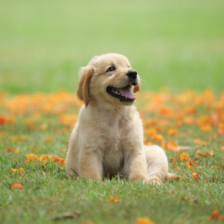

In [13]:
image = Image.open('puppy.jpg')

transform = transforms.Resize(224)
image_crop = transform(image)
display(image_crop)

In [14]:
transform = transforms.Compose([transforms.ToTensor()])

tensor = transform(image_crop)

Shape of the image

In [15]:
print("Intial Shape:")
tensor.shape

Intial Shape:


torch.Size([3, 224, 224])

In [16]:
tensor = tensor.unsqueeze(0)
tensor.shape

torch.Size([1, 3, 224, 224])

In [17]:
embedding = PatchEmbedding()(tensor)

In [18]:
print("Shape after sending patches into linear layer")
embedding.shape

Shape after sending patches into linear layer


torch.Size([1, 196, 256])